In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Scotland_2018

In [5]:
Scotland_2018

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
34,34,RD Berrington (SCOT),11,11,1,381,90,38.10,546,69.78,...,199,7,3/42,28.42,6.03,28.2,0,0,1,0
41,41,DE Budge (SCOT),1,1,0,11,11,11.00,9,122.22,...,-,-,-,-,-,-,-,-,0,0
45,45,SJ Cameron (SCOT),2,2,1,9,8*,9.00,13,69.23,...,123,3,2/64,41.00,6.77,36.3,0,0,1,0
61,61,KJ Coetzer (SCOT),9,9,1,349,75,43.62,373,93.56,...,-,-,-,-,-,-,-,-,2,0
66,66,MH Cross (SCOT),11,11,1,387,114,38.70,449,86.19,...,-,-,-,-,-,-,-,-,8,0
93,93,AC Evans (SCOT),6,3,3,19,13*,-,23,82.60,...,278,9,3/19,30.88,5.57,33.2,0,0,1,0
133,133,MA Jones (SCOT),5,5,0,194,87,38.80,271,71.58,...,-,-,-,-,-,-,-,-,2,0
154,154,MA Leask (SCOT),8,7,3,134,59,33.50,106,126.41,...,296,6,4/37,49.33,5.38,55.0,1,0,4,0
161,161,CS MacLeod (SCOT),11,11,2,534,157*,59.33,535,99.81,...,193,0,-,-,6.43,-,0,0,5,0
207,207,HG Munsey (SCOT),11,11,2,301,55,33.44,363,82.92,...,-,-,-,-,-,-,-,-,7,0


In [6]:
Scotland_2018=Scotland_2018.reset_index()

In [7]:
Scotland_2018

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,34,34,RD Berrington (SCOT),11,11,1,381,90,38.10,546,...,199,7,3/42,28.42,6.03,28.2,0,0,1,0
1,41,41,DE Budge (SCOT),1,1,0,11,11,11.00,9,...,-,-,-,-,-,-,-,-,0,0
2,45,45,SJ Cameron (SCOT),2,2,1,9,8*,9.00,13,...,123,3,2/64,41.00,6.77,36.3,0,0,1,0
3,61,61,KJ Coetzer (SCOT),9,9,1,349,75,43.62,373,...,-,-,-,-,-,-,-,-,2,0
4,66,66,MH Cross (SCOT),11,11,1,387,114,38.70,449,...,-,-,-,-,-,-,-,-,8,0
5,93,93,AC Evans (SCOT),6,3,3,19,13*,-,23,...,278,9,3/19,30.88,5.57,33.2,0,0,1,0
6,133,133,MA Jones (SCOT),5,5,0,194,87,38.80,271,...,-,-,-,-,-,-,-,-,2,0
7,154,154,MA Leask (SCOT),8,7,3,134,59,33.50,106,...,296,6,4/37,49.33,5.38,55.0,1,0,4,0
8,161,161,CS MacLeod (SCOT),11,11,2,534,157*,59.33,535,...,193,0,-,-,6.43,-,0,0,5,0
9,207,207,HG Munsey (SCOT),11,11,2,301,55,33.44,363,...,-,-,-,-,-,-,-,-,7,0


In [8]:
Scotland_2018.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Scotland_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,RD Berrington (SCOT),11,11,1,381,90,38.10,546,69.78,0,...,199,7,3/42,28.42,6.03,28.2,0,0,1,0
1,DE Budge (SCOT),1,1,0,11,11,11.00,9,122.22,0,...,-,-,-,-,-,-,-,-,0,0
2,SJ Cameron (SCOT),2,2,1,9,8*,9.00,13,69.23,0,...,123,3,2/64,41.00,6.77,36.3,0,0,1,0
3,KJ Coetzer (SCOT),9,9,1,349,75,43.62,373,93.56,0,...,-,-,-,-,-,-,-,-,2,0
4,MH Cross (SCOT),11,11,1,387,114,38.70,449,86.19,2,...,-,-,-,-,-,-,-,-,8,0
5,AC Evans (SCOT),6,3,3,19,13*,-,23,82.60,0,...,278,9,3/19,30.88,5.57,33.2,0,0,1,0
6,MA Jones (SCOT),5,5,0,194,87,38.80,271,71.58,0,...,-,-,-,-,-,-,-,-,2,0
7,MA Leask (SCOT),8,7,3,134,59,33.50,106,126.41,0,...,296,6,4/37,49.33,5.38,55.0,1,0,4,0
8,CS MacLeod (SCOT),11,11,2,534,157*,59.33,535,99.81,2,...,193,0,-,-,6.43,-,0,0,5,0
9,HG Munsey (SCOT),11,11,2,301,55,33.44,363,82.92,0,...,-,-,-,-,-,-,-,-,7,0


In [10]:
Scotland_2018_players =Scotland_2018.copy()

In [11]:
Scotland_2018_players.drop('Player',axis=1,inplace=True)

In [12]:
Scotland_2018_players.HS=Scotland_2018_players.HS.str.extract('(\d+)')
Scotland_2018_players['HS'].fillna(value=0, inplace=True)


In [13]:
Scotland_2018_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,11,11,1,381,90,38.10,546,69.78,0,2,...,199,7,3/42,28.42,6.03,28.2,0,0,1,0
1,1,1,0,11,11,11.00,9,122.22,0,0,...,-,-,-,-,-,-,-,-,0,0
2,2,2,1,9,8,9.00,13,69.23,0,0,...,123,3,2/64,41.00,6.77,36.3,0,0,1,0
3,9,9,1,349,75,43.62,373,93.56,0,3,...,-,-,-,-,-,-,-,-,2,0
4,11,11,1,387,114,38.70,449,86.19,2,0,...,-,-,-,-,-,-,-,-,8,0
5,6,3,3,19,13,-,23,82.60,0,0,...,278,9,3/19,30.88,5.57,33.2,0,0,1,0
6,5,5,0,194,87,38.80,271,71.58,0,2,...,-,-,-,-,-,-,-,-,2,0
7,8,7,3,134,59,33.50,106,126.41,0,1,...,296,6,4/37,49.33,5.38,55.0,1,0,4,0
8,11,11,2,534,157,59.33,535,99.81,2,2,...,193,0,-,-,6.43,-,0,0,5,0
9,11,11,2,301,55,33.44,363,82.92,0,1,...,-,-,-,-,-,-,-,-,7,0


In [14]:
Scotland_2018_players.replace("-",0,inplace=True)

In [15]:
Scotland_2018_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Scotland_2018_players_scaled = pd.DataFrame(scaler.fit_transform(Scotland_2018_players),columns=Scotland_2018_players.columns)
Scotland_2018_players_scaled.shape
Scotland_2018_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,1.149958,1.362706,-0.115087,1.372765,0.989994,0.949823,1.907223,-0.990366,-0.365148,1.399735,...,-0.743345,0.291296,0.320128,0.560809,0.873724,0.407387,-0.46291,-0.25,-0.844243,-0.25
1,-1.812056,-1.300053,-1.093327,-0.849807,-0.861763,-0.653282,-0.873649,1.465112,-0.365148,-0.669439,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.46291,-0.25,-1.212246,-0.25
2,-1.515854,-1.033777,-0.115087,-0.861821,-0.932083,-0.771592,-0.852935,-1.016120,-0.365148,-0.669439,...,-0.307591,-0.238035,-0.360144,1.289497,1.138641,0.842923,-0.46291,-0.25,-0.844243,-0.25
3,0.557556,0.830154,-0.115087,1.180542,0.638394,1.276360,1.011337,0.123121,-0.365148,2.434322,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.46291,-0.25,-0.476240,-0.25
4,1.149958,1.362706,-0.115087,1.408806,1.552553,0.985316,1.404905,-0.221976,2.738613,-0.669439,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.46291,-0.25,1.731780,-0.25


In [17]:
Scotland_2018_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,...,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,1.567374e-16,-1.567374e-16,-1.959217e-17,6.530724e-18,3.918434e-17,-2.612289e-17,-5.877651e-17,-3.134747e-16,-6.530724e-18,9.143013e-17,...,5.877651e-17,-7.836868e-17,1.255123e-16,1.632681e-16,-2.351061e-16,1.110223e-16,-8.489941e-17,1.632681e-18,5.387847e-17,1.632681e-18
std,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,...,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00
min,-1.812056e+00,-1.300053e+00,-1.093327e+00,-8.918553e-01,-1.049283e+00,-1.303989e+00,-8.891845e-01,-1.182347e+00,-3.651484e-01,-6.694387e-01,...,-7.433454e-01,-1.094715e+00,-8.703482e-01,-1.085399e+00,-1.284999e+00,-1.108927e+00,-4.629100e-01,-2.500000e-01,-1.212246e+00,-2.500000e-01
25%,-6.272500e-01,-1.033777e+00,-1.093327e+00,-8.317858e-01,-8.148833e-01,-7.715922e-01,-8.529348e-01,-9.060821e-01,-3.651484e-01,-6.694387e-01,...,-7.433454e-01,-1.094715e+00,-8.703482e-01,-1.085399e+00,-1.284999e+00,-1.108927e+00,-4.629100e-01,-2.500000e-01,-8.442429e-01,-2.500000e-01
50%,2.613542e-01,2.976025e-01,-1.150871e-01,-4.713689e-01,-3.226442e-01,-5.113094e-01,-4.282951e-01,-2.219758e-01,-3.651484e-01,-6.694387e-01,...,-7.433454e-01,2.007524e-01,-2.000800e-02,4.412468e-02,4.369671e-01,3.213547e-01,-4.629100e-01,-2.500000e-01,-1.082363e-01,-2.500000e-01
75%,8.537570e-01,8.301542e-01,8.631530e-01,8.922087e-01,6.383942e-01,9.498232e-01,9.595516e-01,4.157742e-01,-3.651484e-01,3.651484e-01,...,9.996714e-01,2.912958e-01,3.201281e-01,7.195220e-01,7.090449e-01,6.762365e-01,-4.629100e-01,-2.500000e-01,6.277703e-01,-2.500000e-01
max,1.149958e+00,1.362706e+00,1.841393e+00,2.291828e+00,2.560471e+00,2.205687e+00,1.907223e+00,1.701576e+00,2.738613e+00,2.434322e+00,...,2.306934e+00,2.053410e+00,2.871149e+00,1.772006e+00,1.489479e+00,1.848422e+00,2.160247e+00,4.000000e+00,2.099784e+00,4.000000e+00


In [18]:
X =  Scotland_2018_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 1.14995842e+00,  1.36270599e+00, -1.15087068e-01,
         1.37276461e+00,  9.89993625e-01,  9.49823237e-01,
         1.90722307e+00, -9.90366267e-01, -3.65148372e-01,
         1.39973542e+00, -5.54700196e-01,  6.73724058e-01,
         1.25886972e+00, -1.31586436e+00,  1.14995842e+00,
         8.56264399e-01,  1.04449512e-01, -7.43345423e-01,
         2.91295848e-01,  3.20128077e-01,  5.60809385e-01,
         8.73723532e-01,  4.07386638e-01, -4.62910050e-01,
        -2.50000000e-01, -8.44242866e-01, -2.50000000e-01],
       [-1.81205569e+00, -1.30005284e+00, -1.09332714e+00,
        -8.49806663e-01, -8.61763253e-01, -6.53281853e-01,
        -8.73648902e-01,  1.46511187e+00, -3.65148372e-01,
        -6.69438681e-01, -5.54700196e-01, -7.70837435e-01,
        -8.46125552e-01, -1.25789033e+00, -1.81205569e+00,
        -1.10326374e+00, -1.03113530e+00, -7.43345423e-01,
        -1.09471520e+00, -8.70348209e-01, -1.08539905e+00,
        -1.28499903e+00, -1.10892667e+00, -4.62910050e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Scotland_2018_players_scaled))

False

In [23]:
Scotland_2018_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,1.149958,1.362706,-0.115087,1.372765,0.989994,0.949823,1.907223,-0.990366,-0.365148,1.399735,...,-0.743345,0.291296,0.320128,0.560809,0.873724,0.407387,-0.462910,-0.25,-0.844243,-0.25
1,-1.812056,-1.300053,-1.093327,-0.849807,-0.861763,-0.653282,-0.873649,1.465112,-0.365148,-0.669439,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.462910,-0.25,-1.212246,-0.25
2,-1.515854,-1.033777,-0.115087,-0.861821,-0.932083,-0.771592,-0.852935,-1.016120,-0.365148,-0.669439,...,-0.307591,-0.238035,-0.360144,1.289497,1.138641,0.842923,-0.462910,-0.25,-0.844243,-0.25
3,0.557556,0.830154,-0.115087,1.180542,0.638394,1.276360,1.011337,0.123121,-0.365148,2.434322,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.462910,-0.25,-0.476240,-0.25
4,1.149958,1.362706,-0.115087,1.408806,1.552553,0.985316,1.404905,-0.221976,2.738613,-0.669439,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.462910,-0.25,1.731780,-0.25
5,-0.331049,-0.767501,1.841393,-0.801751,-0.814883,-1.303989,-0.801149,-0.390076,-0.365148,-0.669439,...,0.999671,0.841521,0.660264,0.703303,0.709045,0.676237,-0.462910,-0.25,-0.844243,-0.25
6,-0.627250,-0.234949,-1.093327,0.249465,0.919674,0.991232,0.483127,-0.906082,-0.365148,1.399735,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.462910,-0.25,-0.476240,-0.25
7,0.261354,0.297602,1.841393,-0.110952,0.263355,0.677709,-0.371331,1.661307,-0.365148,0.365148,...,-0.743345,0.966889,0.150060,1.772006,0.641025,1.848422,2.160247,-0.25,0.259767,-0.25
8,1.149958,1.362706,0.863153,2.291828,2.560471,2.205687,1.850259,0.415774,2.738613,1.399735,...,-0.743345,0.249507,-0.870348,-1.085399,1.016922,-1.108927,-0.462910,-0.25,0.627770,-0.25
9,1.149958,1.362706,0.863153,0.892209,0.169595,0.674160,0.959552,-0.375092,-0.365148,0.365148,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.462910,-0.25,1.363777,-0.25


In [24]:
np.all(np.isfinite(Scotland_2018_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


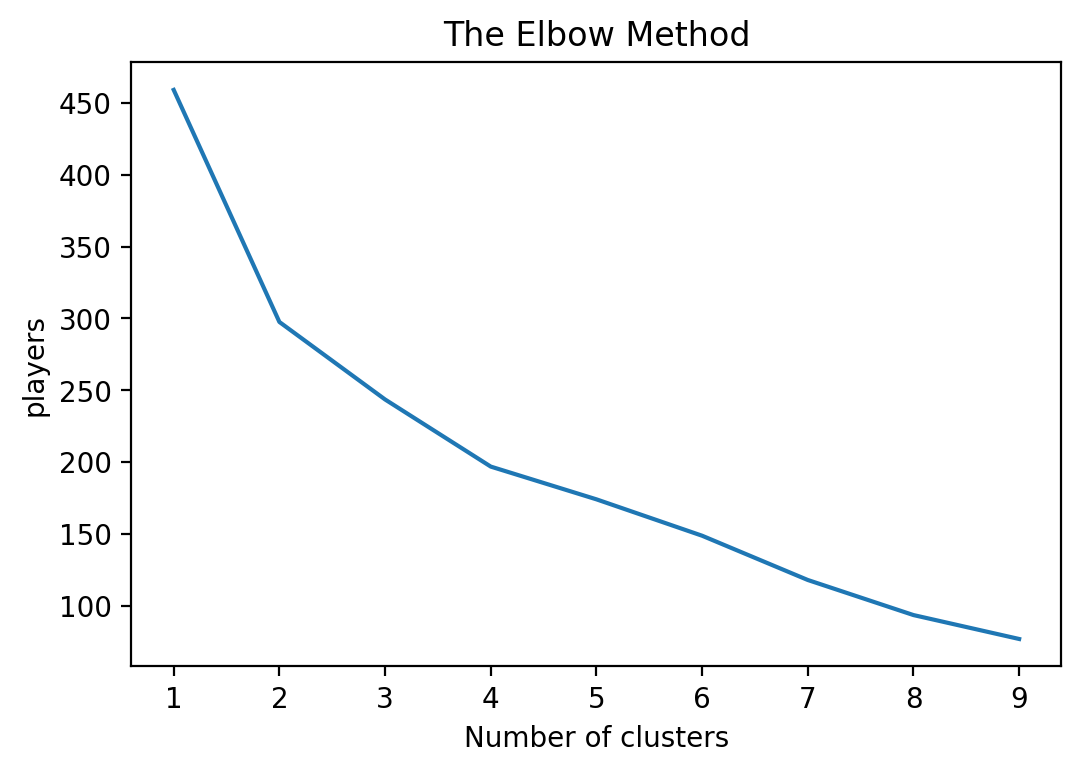

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2])

In [28]:
kmeans.cluster_centers_

array([[ 0.11325348, -0.32370794,  0.53707298, -0.57448815, -0.45156394,
        -0.49060514, -0.61558536,  0.56889045, -0.36514837, -0.49700751,
         0.23112508, -0.56447151, -0.43682092,  0.52550131,  0.11325348,
         0.99623069,  1.13565229,  1.07229713,  1.03421634,  1.02874491,
         0.69606261,  0.44174035,  0.90834358,  0.4114756 ,  0.45833333,
        -0.10823626, -0.25      ],
       [ 1.03147786,  1.25619564,  0.27620896,  1.42922993,  1.1822013 ,
         1.2182694 ,  1.42665525, -0.20970777,  0.87635609,  0.9859006 ,
        -0.08320503,  1.4166414 ,  1.46936925, -0.72121644,  1.03147786,
        -0.31945249, -0.59754837, -0.74334542, -0.54866864, -0.63225295,
        -0.75615736, -0.39287024, -0.80566401, -0.46291005, -0.25      ,
         0.48056902, -0.25      ],
       [-0.97281836, -0.72312176, -0.76724712, -0.6165368 , -0.53360381,
        -0.52461936, -0.57329401, -0.39413397, -0.36514837, -0.32457633,
        -0.16178756, -0.61606299, -0.78765346,  0.0755

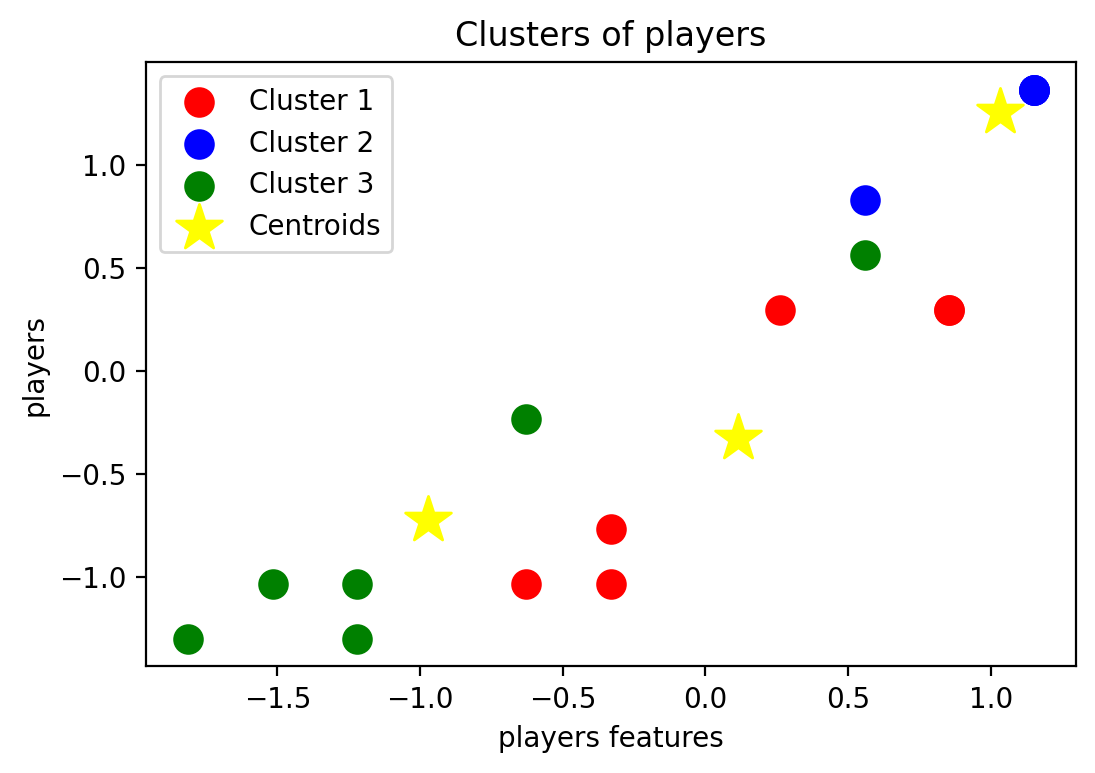

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Scotland_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,RD Berrington (SCOT),11,11,1,381,90,38.10,546,69.78,0,...,199,7,3/42,28.42,6.03,28.2,0,0,1,0
1,DE Budge (SCOT),1,1,0,11,11,11.00,9,122.22,0,...,-,-,-,-,-,-,-,-,0,0
2,SJ Cameron (SCOT),2,2,1,9,8*,9.00,13,69.23,0,...,123,3,2/64,41.00,6.77,36.3,0,0,1,0
3,KJ Coetzer (SCOT),9,9,1,349,75,43.62,373,93.56,0,...,-,-,-,-,-,-,-,-,2,0
4,MH Cross (SCOT),11,11,1,387,114,38.70,449,86.19,2,...,-,-,-,-,-,-,-,-,8,0
5,AC Evans (SCOT),6,3,3,19,13*,-,23,82.60,0,...,278,9,3/19,30.88,5.57,33.2,0,0,1,0
6,MA Jones (SCOT),5,5,0,194,87,38.80,271,71.58,0,...,-,-,-,-,-,-,-,-,2,0
7,MA Leask (SCOT),8,7,3,134,59,33.50,106,126.41,0,...,296,6,4/37,49.33,5.38,55.0,1,0,4,0
8,CS MacLeod (SCOT),11,11,2,534,157*,59.33,535,99.81,2,...,193,0,-,-,6.43,-,0,0,5,0
9,HG Munsey (SCOT),11,11,2,301,55,33.44,363,82.92,0,...,-,-,-,-,-,-,-,-,7,0


In [31]:
Scotland_2018["cluster"] = y_kmeans

In [32]:
Scotland_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,RD Berrington (SCOT),11,11,1,381,90,38.10,546,69.78,0,...,7,3/42,28.42,6.03,28.2,0,0,1,0,1
1,DE Budge (SCOT),1,1,0,11,11,11.00,9,122.22,0,...,-,-,-,-,-,-,-,0,0,2
2,SJ Cameron (SCOT),2,2,1,9,8*,9.00,13,69.23,0,...,3,2/64,41.00,6.77,36.3,0,0,1,0,2
3,KJ Coetzer (SCOT),9,9,1,349,75,43.62,373,93.56,0,...,-,-,-,-,-,-,-,2,0,1
4,MH Cross (SCOT),11,11,1,387,114,38.70,449,86.19,2,...,-,-,-,-,-,-,-,8,0,1
5,AC Evans (SCOT),6,3,3,19,13*,-,23,82.60,0,...,9,3/19,30.88,5.57,33.2,0,0,1,0,0
6,MA Jones (SCOT),5,5,0,194,87,38.80,271,71.58,0,...,-,-,-,-,-,-,-,2,0,2
7,MA Leask (SCOT),8,7,3,134,59,33.50,106,126.41,0,...,6,4/37,49.33,5.38,55.0,1,0,4,0,0
8,CS MacLeod (SCOT),11,11,2,534,157*,59.33,535,99.81,2,...,0,-,-,6.43,-,0,0,5,0,1
9,HG Munsey (SCOT),11,11,2,301,55,33.44,363,82.92,0,...,-,-,-,-,-,-,-,7,0,1


In [33]:
Scotland_2018['cluster'].value_counts()

0    6
2    6
1    5
Name: cluster, dtype: int64

In [34]:
Scotland_Cluster_2018 = np.array([6,5,6])

In [35]:
Scotland_Cluster_2018

array([6, 5, 6])

In [36]:
%store Scotland_Cluster_2018

Stored 'Scotland_Cluster_2018' (ndarray)


In [37]:
Scotland_2018_players_scaled.insert(0, 'Player', Scotland_2018.Player)

In [38]:
Scotland_2018_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,RD Berrington (SCOT),1.149958,1.362706,-0.115087,1.372765,0.989994,0.949823,1.907223,-0.990366,-0.365148,...,-0.743345,0.291296,0.320128,0.560809,0.873724,0.407387,-0.462910,-0.25,-0.844243,-0.25
1,DE Budge (SCOT),-1.812056,-1.300053,-1.093327,-0.849807,-0.861763,-0.653282,-0.873649,1.465112,-0.365148,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.462910,-0.25,-1.212246,-0.25
2,SJ Cameron (SCOT),-1.515854,-1.033777,-0.115087,-0.861821,-0.932083,-0.771592,-0.852935,-1.016120,-0.365148,...,-0.307591,-0.238035,-0.360144,1.289497,1.138641,0.842923,-0.462910,-0.25,-0.844243,-0.25
3,KJ Coetzer (SCOT),0.557556,0.830154,-0.115087,1.180542,0.638394,1.276360,1.011337,0.123121,-0.365148,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.462910,-0.25,-0.476240,-0.25
4,MH Cross (SCOT),1.149958,1.362706,-0.115087,1.408806,1.552553,0.985316,1.404905,-0.221976,2.738613,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.462910,-0.25,1.731780,-0.25
5,AC Evans (SCOT),-0.331049,-0.767501,1.841393,-0.801751,-0.814883,-1.303989,-0.801149,-0.390076,-0.365148,...,0.999671,0.841521,0.660264,0.703303,0.709045,0.676237,-0.462910,-0.25,-0.844243,-0.25
6,MA Jones (SCOT),-0.627250,-0.234949,-1.093327,0.249465,0.919674,0.991232,0.483127,-0.906082,-0.365148,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.462910,-0.25,-0.476240,-0.25
7,MA Leask (SCOT),0.261354,0.297602,1.841393,-0.110952,0.263355,0.677709,-0.371331,1.661307,-0.365148,...,-0.743345,0.966889,0.150060,1.772006,0.641025,1.848422,2.160247,-0.25,0.259767,-0.25
8,CS MacLeod (SCOT),1.149958,1.362706,0.863153,2.291828,2.560471,2.205687,1.850259,0.415774,2.738613,...,-0.743345,0.249507,-0.870348,-1.085399,1.016922,-1.108927,-0.462910,-0.25,0.627770,-0.25
9,HG Munsey (SCOT),1.149958,1.362706,0.863153,0.892209,0.169595,0.674160,0.959552,-0.375092,-0.365148,...,-0.743345,-1.094715,-0.870348,-1.085399,-1.284999,-1.108927,-0.462910,-0.25,1.363777,-0.25


In [39]:
Scotland_2018_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,RD Berrington (SCOT),0.949823,0.560809
1,DE Budge (SCOT),-0.653282,-1.085399
2,SJ Cameron (SCOT),-0.771592,1.289497
3,KJ Coetzer (SCOT),1.276360,-1.085399
4,MH Cross (SCOT),0.985316,-1.085399
5,AC Evans (SCOT),-1.303989,0.703303
6,MA Jones (SCOT),0.991232,-1.085399
7,MA Leask (SCOT),0.677709,1.772006
8,CS MacLeod (SCOT),2.205687,-1.085399
9,HG Munsey (SCOT),0.674160,-1.085399


In [40]:
Scotland_2018_Ave=Scotland_2018_players_scaled.mean()

In [41]:
Scotland_2018_Ave

Mat_x           1.567374e-16
Inns_x         -1.567374e-16
NO             -1.959217e-17
Runs_x          6.530724e-18
HS              3.918434e-17
Ave_x          -2.612289e-17
BF             -5.877651e-17
SR_x           -3.134747e-16
100            -6.530724e-18
50              9.143013e-17
0              -1.044916e-16
4s              3.265362e-17
6s              7.836868e-17
Unnamed: 0_y    7.836868e-17
Mat_y           1.567374e-16
Inns_y         -1.306145e-17
Overs           4.653141e-17
Mdns            5.877651e-17
Runs_y         -7.836868e-17
Wkts            1.255123e-16
Ave_y           1.632681e-16
Econ           -2.351061e-16
SR_y            1.110223e-16
4              -8.489941e-17
5               1.632681e-18
Ct              5.387847e-17
St              1.632681e-18
dtype: float64

In [42]:
Scotland_Ave_2018 =Scotland_2018_Ave[['Ave_x','Ave_y']]

In [43]:
Scotland_Ave_2018

Ave_x   -2.612289e-17
Ave_y    1.632681e-16
dtype: float64

In [44]:
Scotland_Ave_2018 = np.array([Scotland_Ave_2018.Ave_x, Scotland_Ave_2018.Ave_y])

In [45]:
Scotland_Ave_2018

array([-2.61228947e-17,  1.63268092e-16])

In [46]:
%store Scotland_Ave_2018

Stored 'Scotland_Ave_2018' (ndarray)


In [47]:
Scotland_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,RD Berrington (SCOT),11,11,1,381,90,38.10,546,69.78,0,...,7,3/42,28.42,6.03,28.2,0,0,1,0,1
1,DE Budge (SCOT),1,1,0,11,11,11.00,9,122.22,0,...,-,-,-,-,-,-,-,0,0,2
2,SJ Cameron (SCOT),2,2,1,9,8*,9.00,13,69.23,0,...,3,2/64,41.00,6.77,36.3,0,0,1,0,2
3,KJ Coetzer (SCOT),9,9,1,349,75,43.62,373,93.56,0,...,-,-,-,-,-,-,-,2,0,1
4,MH Cross (SCOT),11,11,1,387,114,38.70,449,86.19,2,...,-,-,-,-,-,-,-,8,0,1
5,AC Evans (SCOT),6,3,3,19,13*,-,23,82.60,0,...,9,3/19,30.88,5.57,33.2,0,0,1,0,0
6,MA Jones (SCOT),5,5,0,194,87,38.80,271,71.58,0,...,-,-,-,-,-,-,-,2,0,2
7,MA Leask (SCOT),8,7,3,134,59,33.50,106,126.41,0,...,6,4/37,49.33,5.38,55.0,1,0,4,0,0
8,CS MacLeod (SCOT),11,11,2,534,157*,59.33,535,99.81,2,...,0,-,-,6.43,-,0,0,5,0,1
9,HG Munsey (SCOT),11,11,2,301,55,33.44,363,82.92,0,...,-,-,-,-,-,-,-,7,0,1
